<a href="https://colab.research.google.com/github/zhangxs131/Tensorflow_learning/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##文本分类任务

数据集 keras自带的imdb,影评数据，二分类，pos，neg

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras

In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
print('训练集长度为',len(train_data))
print(train_data[0])

17473536/17464789 [==============================] - 0s 0us/step
训练集长度为 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5

#构建vocab

In [13]:
word_index=imdb.get_word_index()
#由于原来word_index从1开始，这里后移3位即可加入4个specail_token
word_index={k:(v+3) for k,v in word_index.items()}
word_index['<PAD>']=0
word_index['<START']=1
word_index['<UNK>']=2
word_index['<UNUSED>']=3


index_word={v:k for k,v in word_index.items()}

def decode_text(text):
  return ' '.join([index_word.get(i,'?')for i in text])
decode_text(train_data[0])

"<START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [14]:
#padding
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index['<PAD>'],padding='post',maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index['<PAD>'],padding='post',maxlen=256)

In [19]:
vocab_size=10000

model=keras.Sequential([
  keras.layers.Embedding(vocab_size,16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(16,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

x_val=train_data[:5000]
x_train=train_data[5000:]

y_val=train_labels[:5000]
y_train=train_labels[5000:]

history=model.fit(x_train,y_train,epochs=40,batch_size=512,validation_data=(x_val,y_val),verbose=1)

Epoch 1/40
40/40 [==============================] - 2s 25ms/step - loss: 0.6914 - accuracy: 0.5901 - val_loss: 0.6887 - val_accuracy: 0.6812
Epoch 2/40
40/40 [==============================] - 1s 22ms/step - loss: 0.6823 - accuracy: 0.6997 - val_loss: 0.6743 - val_accuracy: 0.7290
Epoch 3/40
40/40 [==============================] - 1s 21ms/step - loss: 0.6575 - accuracy: 0.7500 - val_loss: 0.6422 - val_accuracy: 0.7488
Epoch 4/40
40/40 [==============================] - 1s 21ms/step - loss: 0.6125 - accuracy: 0.7796 - val_loss: 0.5909 - val_accuracy: 0.7884
Epoch 5/40
40/40 [==============================] - 1s 20ms/step - loss: 0.5518 - accuracy: 0.8152 - val_loss: 0.5320 - val_accuracy: 0.8112
Epoch 6/40
40/40 [==============================] - 1s 28ms/step - loss: 0.4873 - accuracy: 0.8414 - val_loss: 0.4741 - val_accuracy: 0.8312
Epoch 7/40
40/40 [==============================] - 1s 21ms/step - loss: 0.4287 - accuracy: 0.8585 - val_loss: 0.4259 - val_accuracy: 0.8472
Epoch 8/40
40

In [20]:
result=model.evaluate(test_data,test_labels,verbose=2)
print(result)

782/782 - 1s - loss: 0.3575 - accuracy: 0.8713 - 1s/epoch - 1ms/step
[0.35746538639068604, 0.8713200092315674]


##plt显示loss和acc变化

In [22]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

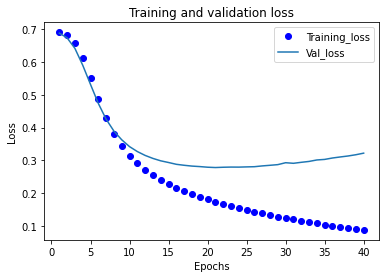

In [25]:
import matplotlib.pyplot as plt

epochs=range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,history_dict['loss'],'bo',label='Training_loss')
plt.plot(epochs,history_dict['val_loss'],label='Val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

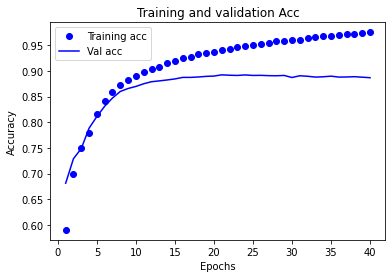

In [26]:
plt.clf() #清除数据

plt.plot(epochs,history_dict['accuracy'],'bo',label='Training acc')
plt.plot(epochs,history_dict['val_accuracy'],'b',label='Val acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()